In [10]:
import os
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
import keras
from bs4 import BeautifulSoup
import numpy as np
import requests
import tensorflow as tf
import pandas as pd
from PIL import Image
from bs4 import BeautifulSoup
import requests
import keras
from io import BytesIO
%matplotlib inline
#import cv2 (non va)
sys.path.append('..')

In [11]:
from keras.applications.imagenet_utils import decode_predictions
from efficientnet.keras import EfficientNetB6
from efficientnet.keras import center_crop_and_resize, preprocess_input

# EFFICIENTNET-B6

In [12]:
model = EfficientNetB6(weights='imagenet')

In [6]:
model

In [7]:
model.summary()

Model: "efficientnet-b6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 528, 528, 3)  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 264, 264, 56) 1512        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 264, 264, 56) 224         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 264, 264, 56) 0           stem_bn[0][0]                    
____________________________________________________________________________________

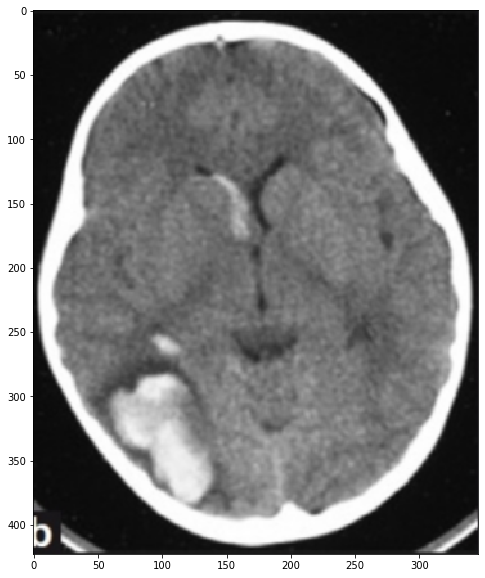

In [8]:
# test image
image = plt.imread('train_y (3).png')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

# Features vector extraction

### How I can obtain the output of an intermediate layer?

One simple way is to create a new Model that will output the layers that you are interested in:

from keras.models import Model

model = ...  # create the original model

layer_name = 'my_layer'

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
                                 
intermediate_output = intermediate_layer_model.predict(data)

In [18]:
#When treating networks as a feature extractor, we essentially “chop off” the
#network at an arbitrary point (normally prior to the fully-connected layers...is avg_pool the right layer? feature dopo il pooling..) 

In [9]:
layer_name = 'avg_pool'
intermediate_layer_model = keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# IMAGES

In [13]:
no_df = pd.read_csv('no_df.csv')
yes_df = pd.read_csv('yes_df.csv')

In [23]:
TRAIN_no=[]
for i in range(1,71):
    TRAIN_no.append(plt.imread('train_no (%s).png' %i))   
    
TRAIN_y=[]
for i in range(1,71):
    TRAIN_y.append(plt.imread('train_y (%s).png' %i))
   
TRAIN=TRAIN_no+TRAIN_y

In [24]:
TEST_no=[]
for i in range(1,11):
    TEST_no.append(plt.imread('test_no (%s).png' %i))   
   
TEST_y=[]
for i in range(1,11):
    TEST_y.append(plt.imread('test_y (%s).png' %i)) 
  

TEST=TEST_no+TEST_y

In [25]:
VALID_no=[]

for i in range(1,21):
    VALID_no.append(plt.imread('valid_no (%s).png' %i))   

VALID_y=[]
for i in range(1,21):
    VALID_y.append(plt.imread('valid_y (%s).png' %i))  
    

VALID=VALID_no+VALID_y

In [83]:
len(L)

140

# Create the set of features vectors to train UMAP

In [59]:
#questo il codice da far girare su ognuna delle 1000 immagini

In [ ]:
#magari faccio un for

In [18]:
IMAGES=TRAIN
xvec=[]
for i in range(len(IMAGES)):
    image=IMAGES[i]
    image_size = model.input_shape[1]
    x = center_crop_and_resize(image, image_size=image_size)
    x = preprocess_input(x)
    x = np.expand_dims(x, 0)
    xvec.append(x)

In [19]:
IMAGES=VALID
xvecV=[]
for i in range(len(IMAGES)):
    image=IMAGES[i]
    image_size = model.input_shape[1]
    x = center_crop_and_resize(image, image_size=image_size)
    x = preprocess_input(x)
    x = np.expand_dims(x, 0)
    xvecV.append(x)

In [26]:
IMAGES=TEST
xvecT=[]
for i in range(len(IMAGES)):
    image=IMAGES[i]
    image_size = model.input_shape[1]
    x = center_crop_and_resize(image, image_size=image_size)
    x = preprocess_input(x)
    x = np.expand_dims(x, 0)
    xvecT.append(x)

In [22]:
len(xvec)

140

In [81]:
Fvector1=[]
xvec1=xvec[:70]
for i in range(len(xvec1)):  
    try:
        x=xvec1[i]
        intermediate_output = intermediate_layer_model.predict(x)
        f_vector=np.reshape(intermediate_output, (np.size(intermediate_output), 1))
        Fvector1.append(f_vector)
        
    except:
        print('dim error')
        
Fvector2=[]
xvec2=xvec[70:]
for i in range(len(xvec2)):  
    try:
        x=xvec[i]
        intermediate_output = intermediate_layer_model.predict(x)
        f_vector=np.reshape(intermediate_output, (np.size(intermediate_output), 1))
        Fvector2.append(f_vector)
        
    except:
        print('dim error')

dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error
dim error


In [93]:
Fvector=Fvector1+Fvector2
len(Fvector)

116

In [83]:
Fvector1V=[]
xvec1=xvecV[:20]
for i in range(len(xvec1)):  
    try:
        x=xvec1[i]
        intermediate_output = intermediate_layer_model.predict(x)
        f_vector=np.reshape(intermediate_output, (np.size(intermediate_output), 1))
        Fvector1V.append(f_vector)
        
    except:
        print('dim error')
        
Fvector2V=[]
xvec2=xvecV[20:]
for i in range(len(xvec2)):  
    try:
        x=xvec[i]
        intermediate_output = intermediate_layer_model.predict(x)
        f_vector=np.reshape(intermediate_output, (np.size(intermediate_output), 1))
        Fvector2V.append(f_vector)
        
    except:
        print('dim error')

In [94]:
FvectorV=Fvector1V+Fvector2V

In [ ]:
Fvector1T=[]
xvec1=xvecT[:10]
for i in range(len(xvec1)):  
    try:
        x=xvec1[i]
        intermediate_output = intermediate_layer_model.predict(x)
        f_vector=np.reshape(intermediate_output, (np.size(intermediate_output), 1))
        Fvector1T.append(f_vector)
        
    except:
        print('dim error')
        
Fvector2T=[]
xvec2=xvecT[20:]
for i in range(len(xvec2)):  
    try:
        x=xvec[i]
        intermediate_output = intermediate_layer_model.predict(x)
        f_vector=np.reshape(intermediate_output, (np.size(intermediate_output), 1))
        Fvector2T.append(f_vector)
        
    except:
        print('dim error')
        

In [ ]:
FvectorT=Fvector1T+Fvector2T

In [84]:
#1 disease
L=[]
y_train=[]

for i in range(len(Fvector1)): 
    L.append(1)
    y_train.append(0)
    
for i in range(len(Fvector2)):
    L.append(5)
    y_train.append(1)

In [85]:
#1 disease
y_test=[]

for i in range(len(Fvector1T)): 
    y_test.append(0)
    
for i in range(len(Fvector2T)):
    y_test.append(1)

NameError: name 'Fvector1T' is not defined

In [86]:
#1 disease
y_valid=[]

for i in range(len(Fvector1V)): 
    y_valid.append(0)
    
for i in range(len(Fvector2V)):
    y_valid.append(1)

In [87]:
import random

c = list(zip(Fvector, y_train))

random.shuffle(c)

Fvector, y_train = zip(*c)

In [95]:
c = list(zip(FvectorV, y_valid))

random.shuffle(c)

FvectorV, y_valid = zip(*c)

In [96]:
from sklearn import model_selection
from sklearn import preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [132]:
Fvector=np.array(Fvector)
FvectorV=np.array(FvectorV)

In [134]:
Fvector=Fvector.reshape(116, 2304)
FvectorV=FvectorV.reshape(40, 2304)

In [135]:
np.shape(Fvector)

(116, 2304)

In [154]:
MLP=MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(100,), learning_rate='constant',
               learning_rate_init=0.001, max_iter=200, momentum=0.9,
               n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
               random_state=None, shuffle=True, solver='adam', tol=0.0001,
               validation_fraction=0.1, verbose=False, warm_start=False).fit(Fvector, y_train)

In [155]:
MLP.score(FvectorV, y_valid)

0.7

In [169]:
GS=GridSearchCV(estimator=linear_model.LogisticRegression(),
             param_grid={'multi_class':('auto', 'ovr', 'multinomial'), 'C': (0.001, 0.01, 0.1, 1, 10 , 100, 1000), 'max_iter': (100, 200, 300, 400, 500), 'solver': ('newton-cg', 'lbfgs',  'sag', 'saga')})  #solver 'liblinear',

In [170]:
GS=GS.fit(Fvector, y_train)

C:\Users\arian\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\arian\anaconda\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\arian\anaconda\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\arian\anaconda\lib\site-packages\

C:\Users\arian\anaconda\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\arian\anaconda\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\arian\anaconda\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning

C:\Users\arian\anaconda\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian

C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterati

C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not conver

C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not conver

C:\Users\arian\anaconda\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sk

C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\arian

C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not conver

In [171]:
GS.get_params()

{'cv': 'warn',
 'error_score': 'raise-deprecating',
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'warn',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'warn',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'iid': 'warn',
 'n_jobs': None,
 'param_grid': {'multi_class': ('auto', 'ovr', 'multinomial'),
  'C': (0.001, 0.01, 0.1, 1, 10, 100, 1000),
  'max_i

In [172]:
LR=linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False).fit(Fvector, y_train)

C:\Users\arian\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [173]:
LR.score(FvectorV, y_valid)

0.6

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

In [147]:
r=[]
for i in range(4):
    r.append(np.arange(1, 100))

In [148]:
GS_MLP=GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation':('identity', 'logistic', 'tanh', 'relu'), 'hidden_layer_sizes':r, 'alpha': (10.0 ** -np.arange(1, 7))})

In [150]:
#GS=GS_MLP.fit(Fvector, y_train)

C:\Users\arian\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

C:\Users\arian\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

C:\Users\arian\anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [151]:
GS.get_params()

{'cv': 'warn',
 'error_score': 'raise-deprecating',
 'estimator__activation': 'relu',
 'estimator__alpha': 0.0001,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': False,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (100,),
 'estimator__learning_rate': 'constant',
 'estimator__learning_rate_init': 0.001,
 'estimator__max_iter': 200,
 'estimator__momentum': 0.9,
 'estimator__n_iter_no_change': 10,
 'estimator__nesterovs_momentum': True,
 'estimator__power_t': 0.5,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__solver': 'adam',
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': False,
 'estimator__warm_start': False,
 'estimator': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
               beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(100,), learning_rate='cons

In [ ]:
e poi rialleni su tutto

# UMAP

In [174]:
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [175]:
import umap
import umap.umap_ as umap

In [176]:
#2 categorie, i cluster son ben distinti
#3 categorie

In [177]:
reducer = umap.UMAP(random_state=42, metric='jaccard')

In [178]:
np.shape(Fvector)

(116, 2304)

In [179]:
#ridurre la dimensione!!
d=np.shape(Fvector)
Fvector=np.reshape(Fvector,[d[0], d[1]])
np.shape(Fvector)

(116, 2304)

In [180]:
reducer.fit(Fvector)         #arg=la lista dei vettori
                             #train the reducer

C:\Users\arian\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='jaccard',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [181]:
embedding = reducer.transform(Fvector)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(116, 2)

In [198]:
kmeans_labels.labels_

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0])

Text(0.5, 1.0, 'UMAP projection of the Features Vectors')

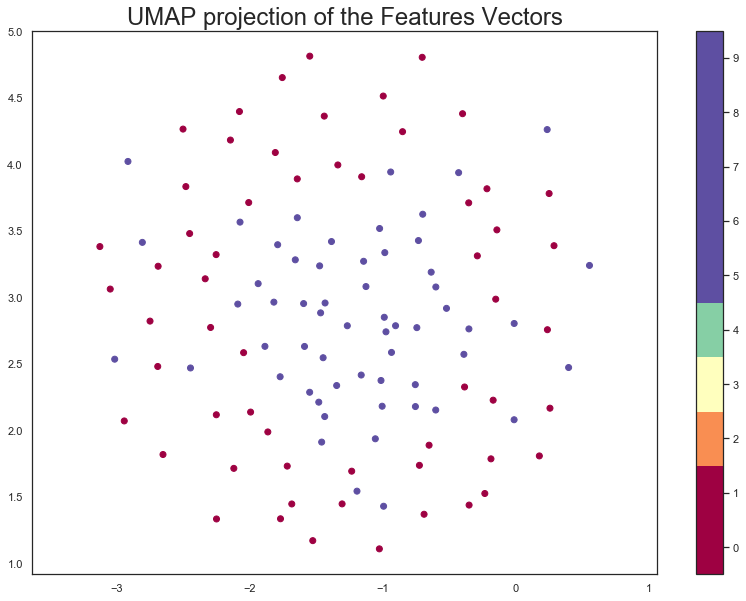

In [200]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=L, cmap='Spectral')  
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Features Vectors', fontsize=24)

In [201]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(Fvector);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=L, cmap='Spectral')
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=L, cmap='Spectral')
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=L, s=100)
    plt.title(title, fontsize=18)

In [184]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

C:\Users\arian\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\arian\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\arian\anaconda\lib\site-package

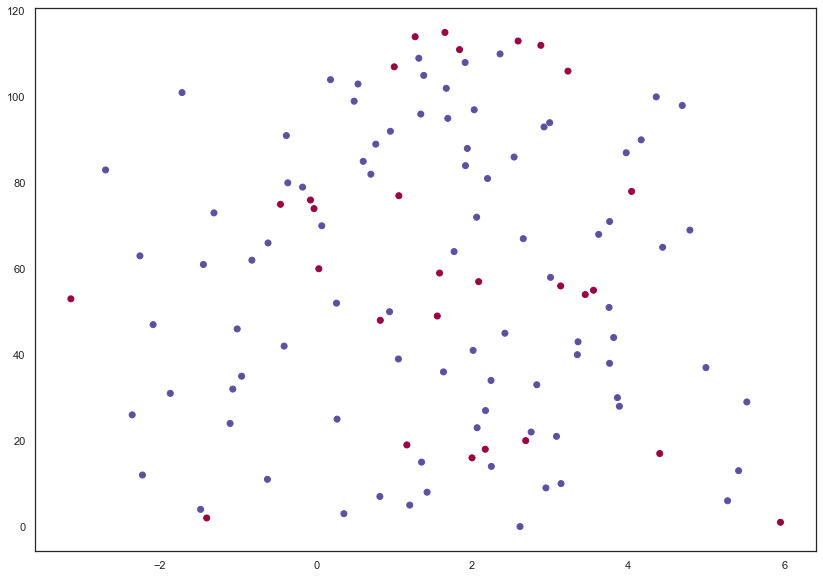

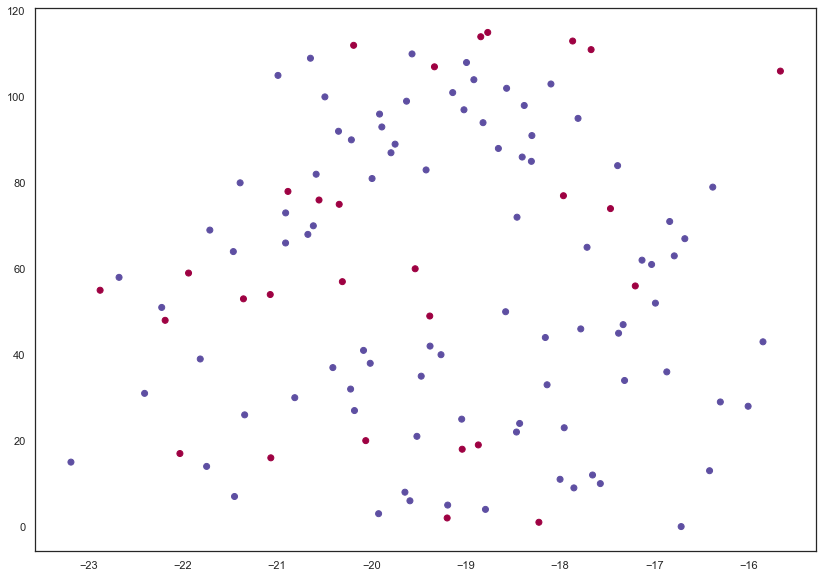

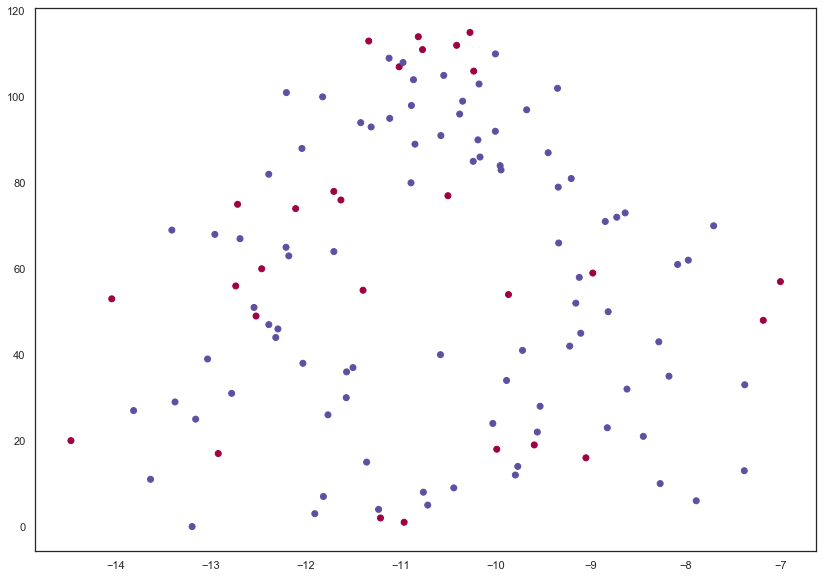

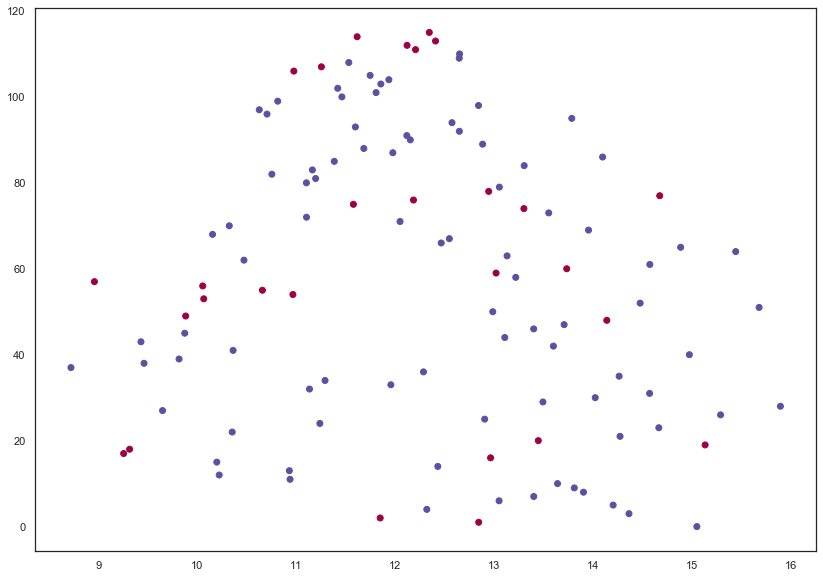

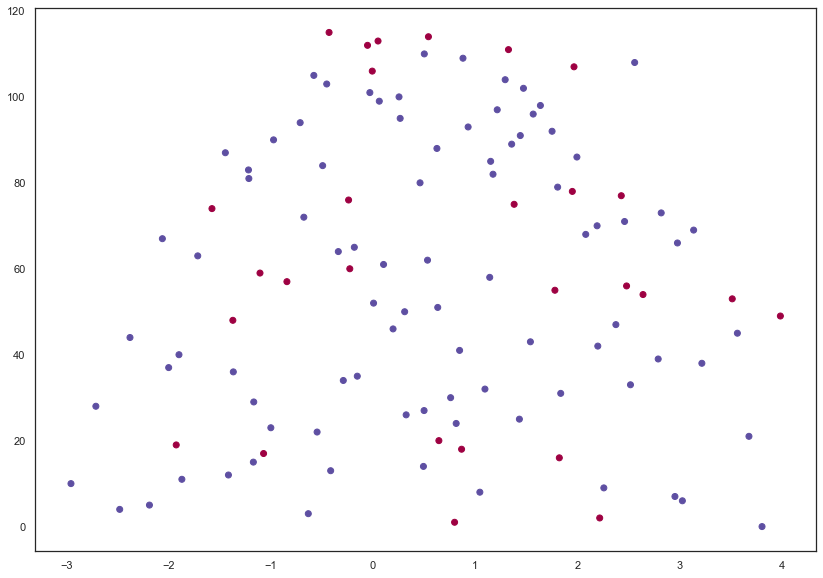

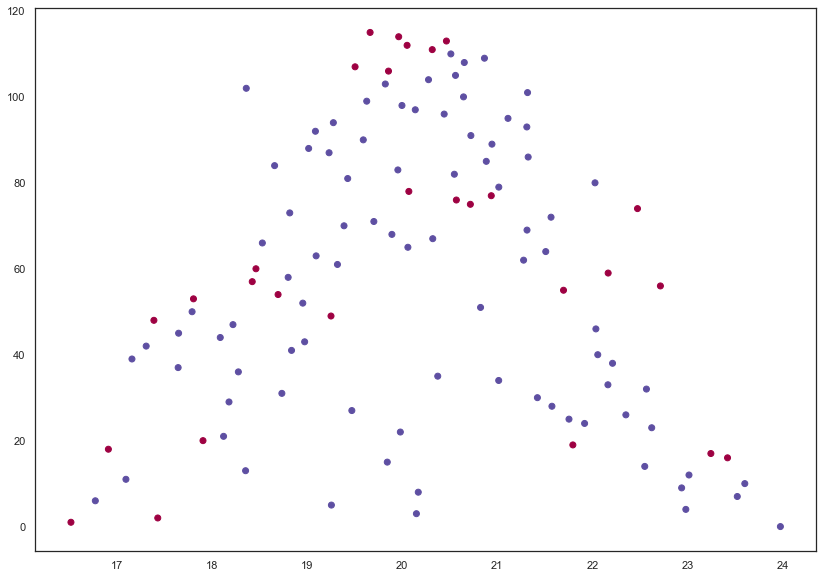

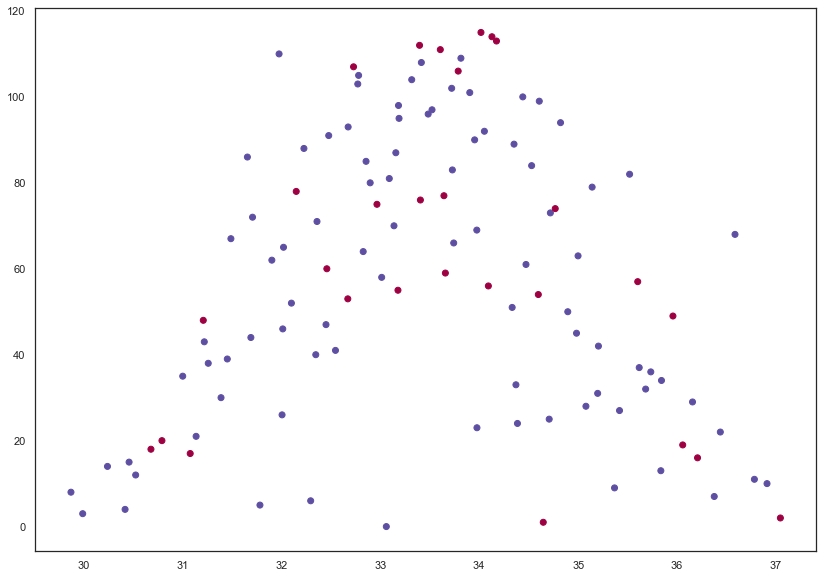

In [202]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_components=1, metric='jaccard', n_neighbors=n)

In [ ]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, metric='jaccard', n_components=1, n_neighbors=2)

In [ ]:
for n in (1, 2, 3):
    draw_umap(n_components=n, metric='jaccard', n_neighbors=50)

In [193]:

from sklearn.cluster import KMeans

In [195]:
kmeans_labels=cluster.KMeans(n_clusters=2).fit(Fvector)